#  Problem Set 3

# Question 1

In [28]:
# step 1)
import urllib
import requests
import urllib.request
import pandas as pd
import numpy as np

In [29]:
#step 2 and 3)
users=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [17]:
response = requests.get('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user')
print(response.status_code)

200


In [22]:
#4)
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [85]:
#5)
gender_total = users['gender'].value_counts()
gender_occupation = users.groupby('gender')['occupation'].value_counts()
sex_ratio = gender_occupation['M']/gender_occupation['F']
print(sex_ratio.sort_values(ascending=False))

occupation
engineer         32.500000
technician       26.000000
retired          13.000000
programmer       10.000000
executive         9.666667
scientist         9.333333
entertainment     8.000000
lawyer            5.000000
salesman          3.000000
educator          2.653846
student           2.266667
other             1.916667
marketing         1.600000
writer            1.368421
none              1.250000
administrator     1.194444
artist            1.153846
librarian         0.758621
healthcare        0.454545
homemaker         0.166667
doctor                 NaN
Name: occupation, dtype: float64


In [24]:
#6)
print(users.groupby('occupation').age.min())
print(users.groupby('occupation').age.max())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [25]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [26]:
#7)
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [27]:
#8)
# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).count()

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question 2

In [30]:
#step 1,2,and 3) # We have already imported the required libraries. So step 1 is not done extra
euro12=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [31]:
#step 4)
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [33]:
#5)
euro12.Team.value_counts().count()

16

In [34]:
#6)
euro12.shape[1] #shape function return sthe dimension

35

In [35]:
#7)
 
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [36]:
#8) 
discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending=False)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [37]:
#9)
round(discipline['Yellow Cards'].mean())

7

In [41]:
#10)
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [ ]:
#11)
#Question not mentioned

In [46]:
#12)
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [48]:
#13)
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [49]:
#14)
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [73]:
#step 1:
import random
import numpy as np
import pandas as pd

In [74]:
#2:
first = pd.Series(random.randint(1,4) for _ in range(100))
second = pd.Series(random.randint(1,3) for _ in range(100))
third = pd.Series(random.randint(1000,3000) for _ in range(100))

In [76]:
#3:
data = pd.concat([first, second, third], axis = 1)
data

,0,1,2
0,3,2,1172
1,4,1,2593
2,2,1,1182
3,2,1,2715
4,1,1,1062
...,...,...,...
95,2,2,2353
96,3,3,2103
97,3,2,2710
98,2,3,1552


In [77]:
#4:
data.columns = ["bedrs", "bathrs", "price_sqr_meter"]
data

,bedrs,bathrs,price_sqr_meter
0,3,2,1172
1,4,1,2593
2,2,1,1182
3,2,1,2715
4,1,1,1062
...,...,...,...
95,2,2,2353
96,3,3,2103
97,3,2,2710
98,2,3,1552


In [78]:
#5:
data2 = pd.concat([first, second, third])
data2

0        3
1        4
2        2
3        2
4        1
      ... 
95    2353
96    2103
97    2710
98    1552
99    2430
Length: 300, dtype: int64

In [81]:
#6:
# True

In [79]:
#7:
data2.reset_index(drop=True)

0         3
1         4
2         2
3         2
4         1
       ... 
295    2353
296    2103
297    2710
298    1552
299    2430
Length: 300, dtype: int64

# Question 4:

In [82]:
#step 1:
import pandas as pd

In [120]:
#2:
data=pd.read_csv(r"C:\Users\rinuf\Desktop\BDAT1004-Data Programming-Roshan Sahu\wind.csv")
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,#NUM!,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,#NUM!,10.83,6.5,12.62,7.67,11.5,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.5,16.88,12.33,10.13,11.17,6.17,11.25,#NUM!,8.5,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.5,16.42,18.88,29.58
6572,78,12,30,18.5,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [122]:
#3:
data = pd.read_table('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [123]:
#4:
import datetime
def date_fix(d):
    year = d.year - 100 if d.year > 1989 else d.year
    return datetime.date(year, d.month ,d.day)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [124]:
#5:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [125]:
#6:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [126]:
#7:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [127]:
#8:
y = data.mean()
y.mean()

10.227982360836924

In [128]:
#9:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [129]:
#10:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1) 
day_stats['max'] = data.max(axis = 1) 
day_stats['mean'] = data.mean(axis = 1) 
day_stats['std'] = data.std(axis = 1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [130]:
#11:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [131]:
#12:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [132]:
#13:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [133]:
#14:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [134]:
#15:
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
print (stats1)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

# Question 5

In [51]:
#step 1:
import pandas as pd

In [53]:
#step 2 and 3:
chipo=pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [54]:
#step 4:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [55]:
#5:
chipo.shape[0]

4622

In [56]:
#6:
len(chipo.columns)

5

In [58]:
#7:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [57]:
#8:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [59]:
#9:
item_quants = chipo.groupby(['item_name']).agg({'quantity':'sum'})
item_quants.sort_values('quantity',ascending=False)[:5]

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [60]:
#10:
item_quants = chipo.groupby(['item_name']).agg({'quantity':'sum'})
item_quants.sort_values('quantity',ascending=False)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [61]:
#11:
item_quants = chipo.groupby(['choice_description']).agg({'quantity':'sum'})
item_quants.sort_values('quantity',ascending=False)[:5]

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42


In [62]:
#12:
chipo.quantity.sum()

4972

In [63]:
#13:

#a)
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [64]:
#b):
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [65]:
#c):
lam = lambda x : float(x[1:])
chipo.item_price.apply(lam)[:5]

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [66]:
#d):
chipo['item_price']=chipo.item_price.apply(lam)

In [67]:
#step 14:
chipo['item_price'].sum()

34500.16

In [69]:
#step 15:
chipo.shape

(4622, 5)

In [70]:
#step 16:
chipo['item_price'].mean()   

7.464335785374397

In [72]:
#step 17:
chipo.item_name.nunique()

50

# Question 6

In [100]:
import pandas as pd
data=pd.read_csv(r"C:\Users\rinuf\Downloads\us-marriages-divorces-1867-2014.csv")
data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


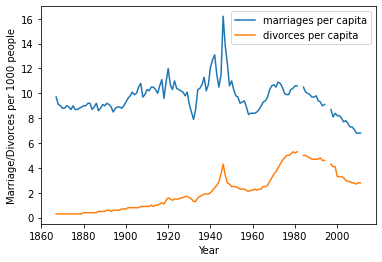

In [102]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
data=pd.read_csv(r"C:\Users\rinuf\Downloads\us-marriages-divorces-1867-2014.csv")
marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']
columns = marriages_per_capita, divorces_per_capita
years = data['Year']
ind = ["marriages per capita", "divorces per capita"]
x_data = range(1867, 1867 + data.shape[0])
fig, ax = plt.subplots()
for i in range(len(columns)):
    ax.plot(x_data, columns[i], label=ind[i])

ax.set_xlabel('Year')
ax.set_ylabel('Marriage/Divorces per 1000 people')
ax.legend()

# Question 7

C:\Users\rinuf\AppData\Local\Temp\ipykernel_55112\3181201498.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  specific_data = specific_data.append(data.loc[data['Year'] == 1950])
C:\Users\rinuf\AppData\Local\Temp\ipykernel_55112\3181201498.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  specific_data = specific_data.append(data.loc[data['Year'] == 2000])


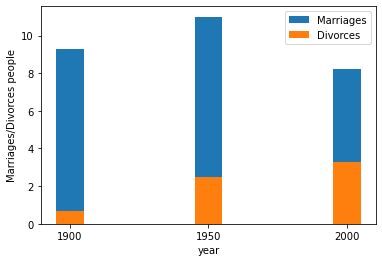

In [104]:
marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

year = [1900, 1950, 2000]
ind = ["marriages per capita", "divorces per capita"]

specific_data = data.loc[data['Year'] == 1900]
specific_data = specific_data.append(data.loc[data['Year'] == 1950])
specific_data = specific_data.append(data.loc[data['Year'] == 2000])
columns = specific_data['Marriages_per_1000'], specific_data['Divorces_per_1000']
data = data[['Year','Marriages_per_1000','Divorces_per_1000']]
data

import matplotlib.pyplot as plt
x = ["1900","1950","2000"]
Marriages = [9.3,11.0,8.2]
Divorces = [0.7,2.5,3.3]

plt.bar(x,Marriages,0.2,label="Marriages")
plt.bar(x,Divorces,0.2,label="Divorces")
       
plt.xlabel("year")
plt.ylabel("Marriages/Divorces people")
plt.legend()
plt.show()


# Question 8

In [113]:
import matplotlib.pyplot as plt
Hollywood_actors = pd.read_csv(r"C:\Users\rinuf\Downloads\actor_kill_counts.csv")
Hollywood_actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


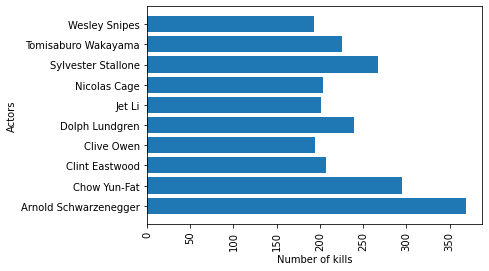

In [105]:
x =Hollywood_actors['Actor'].values
y =Hollywood_actors['Count'].values
plt.xticks(rotation='vertical')
plt.xlabel('Number of kills')
plt.ylabel('Actors')
plt.barh(x,y)
plt.show()

# Question 9

C:\Users\rinuf\AppData\Local\Temp\ipykernel_55112\551309663.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append(data.loc[data['Cause_of_Death'] == 'Possibly assassinated'])
C:\Users\rinuf\AppData\Local\Temp\ipykernel_55112\551309663.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append(data.loc[data['Cause_of_Death'] == 'Possibly assassinated'])


([<matplotlib.patches.Wedge at 0x1da10f4a9d0>,
 [Text(1.0977957711837816, 0.06960204573866097, 'Caligula'),
  Text(1.090104102845483, 0.14721767882779735, 'Galba'),
  Text(1.0875454991521547, 0.16505995054491746, 'Vitellius'),
  Text(1.0310118701458997, 0.38342473005565836, 'Domitian'),
  Text(0.8053709016107381, 0.7492514336580924, 'Commodus'),
  Text(0.6405411181448973, 0.8942634264945004, 'Pertinax'),
  Text(0.396974325483376, 1.0258710371713486, 'Caracalla'),
  Text(0.08880259017546775, 1.0964096405897423, 'Geta'),
  Text(-0.008435550030035769, 1.0999676547497617, 'Elagabalus'),
  Text(-0.24782465563908013, 1.0717196182105522, 'Severus Alexander'),
  Text(-0.46880072294967184, 0.9951009406898704, 'Maximinus I'),
  Text(-0.5139483714648845, 0.9725518348492246, 'Pupienus'),
  Text(-0.5203119185587748, 0.9691622709359291, 'Balbinus'),
  Text(-0.5486673305497047, 0.9533961193478088, 'Trebonianus Gallus'),
  Text(-0.5754397918369155, 0.9374801576410497, 'Aemilian'),
  Text(-0.7491986007

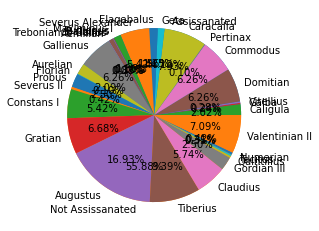

In [110]:
import pandas as pd
data=pd.read_csv(r"C:\Users\rinuf\Downloads\roman-emperor-reigns.csv")
data
val = data.loc[data['Cause_of_Death'] == 'Assassinated']
val = val.append(data.loc[data['Cause_of_Death'] == 'Possibly assassinated'])
v = len(val)/len(data)*100
plt.pie([v, 100-v], labels=['Assissanated', 'Not Assissanated'], autopct='%1.2f%%')
data = pd.read_csv(r"C:\Users\rinuf\Downloads\roman-emperor-reigns.csv")
val = data.loc[data['Cause_of_Death'] == 'Assassinated']
roman_emperor_reign_lengths = data['Length_of_Reign'].values

val = val.append(data.loc[data['Cause_of_Death'] == 'Possibly assassinated'])
plt.pie(val['Length_of_Reign'], labels=val['Emperor'], autopct='%1.2f%%')

# Question 10

In [114]:
import pandas as pd
data = pd.read_csv(r"C:\Users\rinuf\Downloads\arcade-revenue-vs-cs-doctorates.csv")
data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0, 0.5, 'Computer Science Awarded in (US)')

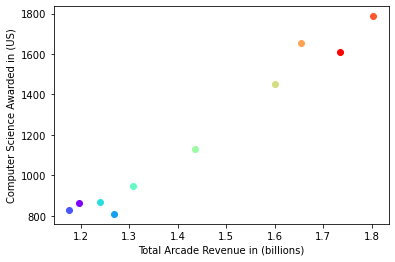

In [116]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
data1 = pd.read_csv(r"C:\Users\rinuf\Downloads\arcade-revenue-vs-cs-doctorates.csv")
data = data1['Total Arcade Revenue (billions)'].values
data2 = data1['Computer Science Doctorates Awarded (US)'].values
fig, ax = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, len(data1['Year'])))
for i in range(len(data1['Year'])):
    ax.scatter(data[i], data2[i],color=colors[i])
ax.set_xlabel('Total Arcade Revenue in (billions)')
ax.set_ylabel('Computer Science Awarded in (US)')